In [173]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import shapiro
from scipy import stats 

In [174]:
#read in data
data = pd.read_csv('batSpeed.csv')
data = pd.DataFrame(data)

# drop unnecessary columns 
data = data.drop([
        "pos3_int_start_distance",
        "pos4_int_start_distance",
        "pos5_int_start_distance",
        "pos6_int_start_distance",
        "pos7_int_start_distance",
        "pos8_int_start_distance",
        "pos9_int_start_distance",
        "pitches",
        "total_pitches",
        'bb'], axis = 1)

Before creating a correlation matrix I need to check the dirtribution of the variables in order to pick the correct correlation formula. 

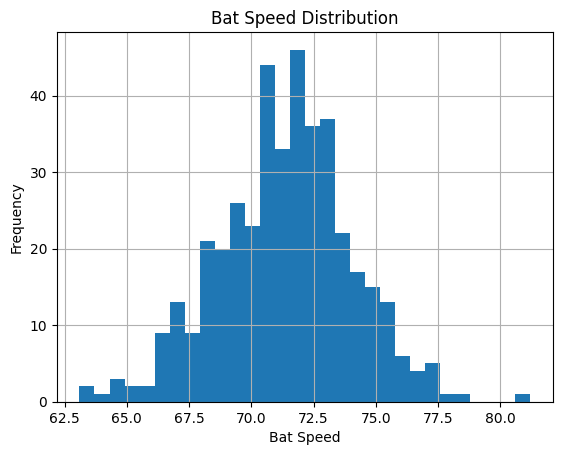

In [175]:
# Distribution of bat_speed 
data['bat_speed'].hist(bins=30)
plt.title('Bat Speed Distribution')
plt.xlabel("Bat Speed")
plt.ylabel('Frequency')
plt.show()


In [176]:
#Run Shapiro-Wilk test to check for normallity 
stat, p = shapiro(data['bat_speed'])
print(f'Shapiro-Wilk Test p-value: {p}')

Shapiro-Wilk Test p-value: 0.4114457069924393


Since p = 0.411 > 0.05 

- fail to reject null hypothesis 
- Bat Speed is likely normally distributed 

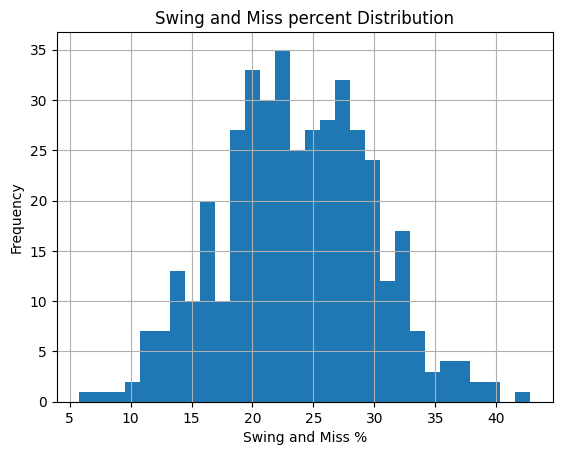

In [177]:
#Distribution of swing and miss percent

data['swing_miss_percent'].hist(bins=30)
plt.title('Swing and Miss percent Distribution')
plt.xlabel("Swing and Miss %")
plt.ylabel('Frequency')
plt.show()

In [178]:
#Run Shapiro-Wilk test to check for normallity 
stat, p = shapiro(data['swing_miss_percent'])
print(f'Shapiro-Wilk Test p-value: {p}')

Shapiro-Wilk Test p-value: 0.8801089110072543


Since p = 0.88 > 0.05 

- fail to reject null hypothesis 
- Swintg and Miss Percent is likely normally distributed 

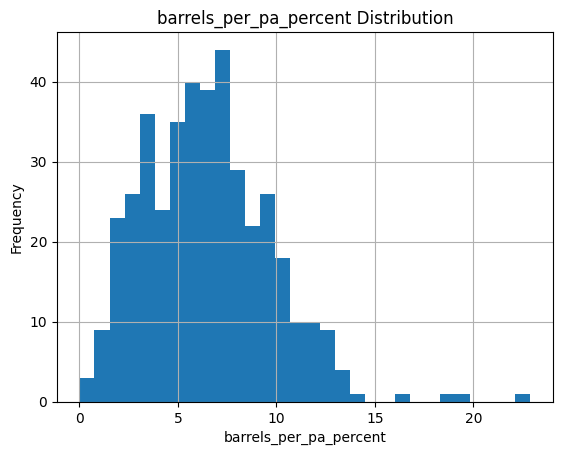

In [179]:
#Distribution of swing and miss percent

data['barrels_per_pa_percent'].hist(bins=30)
plt.title('barrels_per_pa_percent Distribution')
plt.xlabel("barrels_per_pa_percent")
plt.ylabel('Frequency')
plt.show()

In [180]:
#Run Shapiro-Wilk test to check for normallity 
stat, p = shapiro(data['barrels_per_pa_percent'])
print(f'Shapiro-Wilk Test p-value: {p}')

Shapiro-Wilk Test p-value: 6.06053264082387e-08


In [181]:
column_n = np.array([])
p_value = np.array([])

for column in data.columns: 
    if column == 'player_name':
        continue
    stat, p = shapiro(data.select_dtypes(include=[np.number])[column])
    column_n = np.append(column_n, column)
    p_value = np.append(p_value, p)

p_values = pd.DataFrame({"Stat" : column_n, 'p_value': p_value})
p_values["Normality"] = p_values['p_value'] > 0.05

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


In [182]:
p_values

,Stat,p_value,Normality
0,player_id,2.517529e-20,False
1,pitch_percent,1.723830e-01,True
2,ba,2.569654e-01,True
3,iso,2.384525e-04,False
4,babip,5.361335e-01,True
5,slg,5.174951e-05,False
6,woba,4.855133e-04,False
7,xwoba,3.494802e-09,False
8,xba,2.434732e-02,False
9,hits,4.477421e-08,False


In [186]:
#Create Z_score dataframe to identify outliers

#Z-scores
numeric_cols = data.select_dtypes(include=[np.number])
zscores = stats.zscore(numeric_cols)

#Create data frame and add player names back 
z_scores_df = pd.DataFrame(zscores, columns=numeric_cols.columns)
z_scores_df['player_name'] = data['player_name']

z_scores_df


,player_id,pitch_percent,ba,iso,babip,slg,woba,xwoba,xba,hits,abs,launch_speed,launch_angle,spin_rate,velocity,effective_speed,whiffs,swings,takes,eff_min_vel,release_extension,pitcher_run_exp,run_exp,bat_speed,swing_length,pa,bip,singles,doubles,triples,hrs,so,k_percent,bb_percent,api_break_z_with_gravity,api_break_z_induced,api_break_x_arm,api_break_x_batter_in,hyper_speed,bbdist,hardhit_percent,barrels_per_bbe_percent,barrels_per_pa_percent,release_pos_z,release_pos_x,plate_x,plate_z,obp,barrels_total,batter_run_value_per_100,xobp,xslg,pitcher_run_value_per_100,xbadiff,xobpdiff,xslgdiff,wobadiff,swing_miss_percent,arm_angle,player_name
0,0.709196,2.378320,0.975432,0.831424,1.715571,1.049377,1.095129,0.024490,-0.241914,2.150170,1.998172,-0.007118,1.180417,0.914493,-0.576647,-0.195055,3.542330,2.448705,NaN,1.530100,-1.244803,-0.701152,0.701152,-0.026464,0.525710,1.992872,1.554317,1.613814,3.284481,1.408429,1.348818,3.162838,1.101788,NaN,1.067482,-1.540780,-1.647158,0.726027,-0.417879,1.920724,0.156492,0.325089,0.199880,0.231355,0.282333,1.852782,-1.399631,0.988617,1.185803,1.027877,-0.262047,0.163088,-1.027877,1.903661,1.934432,1.700550,1.902785,1.320167,-0.107606,"Tovar, Ezequiel"
1,-0.418308,0.358400,-0.062714,0.768340,-0.009625,0.557955,0.353322,0.632323,0.153739,1.247393,1.551712,1.291677,0.704342,-0.110975,1.726501,1.988243,2.405812,2.273697,NaN,1.530100,1.381569,1.194325,-1.194325,0.910231,0.001273,1.558442,1.244955,0.833069,1.603330,-0.233852,1.584091,2.349906,0.825261,NaN,-1.445959,1.069578,0.617313,-0.151021,0.774707,1.836170,1.190249,1.285595,1.211707,1.420356,-0.150625,0.780064,1.175736,-0.082871,1.982570,0.082594,0.171251,0.760862,-0.082594,-0.302749,-0.355355,-0.302021,-0.379618,0.430052,-0.107606,"Olson, Matt"
2,-0.000668,0.679751,0.860082,1.273012,0.659854,1.325053,1.291490,1.118588,0.549393,1.876601,1.779154,0.118572,1.505013,1.550990,1.726501,1.883444,2.378426,2.068252,NaN,0.744063,0.665286,-1.577453,1.577453,0.835296,2.099020,1.758948,1.534982,1.440315,1.963577,-0.781280,2.407544,2.106027,0.445036,NaN,-1.549358,1.134994,0.190404,1.492105,0.015789,1.328848,0.360020,1.165809,1.181649,0.033188,0.017748,-0.292654,1.175736,0.901739,2.115365,1.469778,0.532331,1.307762,-1.469778,0.683094,0.766173,0.175866,0.510132,0.591891,1.209235,"Adames, Willy"
3,-0.370380,0.610890,-0.264576,1.919624,-1.606074,1.337038,0.855133,0.267623,-0.673537,1.302107,1.737035,0.495641,2.132566,0.666966,0.309179,0.206671,1.077592,2.045425,NaN,-0.041973,-0.050998,-0.224901,0.224901,0.647957,-0.260945,1.733885,1.738001,0.572820,0.522591,0.313575,3.466269,1.130508,-0.367263,NaN,-0.061333,-0.132549,-0.348190,-1.182345,0.449456,1.328848,0.476101,1.069517,1.262444,-0.759479,-0.198731,-0.185382,0.122177,-0.285585,2.181762,0.765388,-0.659236,0.659114,-0.765388,0.448369,0.392331,1.359203,1.090404,-0.686638,0.067973,"Santander, Anthony"
4,-0.998094,1.919247,-0.005040,0.279438,-0.138371,0.210364,0.178779,0.535069,0.729235,1.384178,1.678069,-0.258498,0.228268,0.949854,-2.348299,-2.273555,2.529049,1.912266,NaN,-0.041973,0.426525,0.918100,-0.918100,0.198343,0.787928,1.658695,1.631657,1.180067,1.603330,1.408429,0.878274,1.211801,-0.246282,NaN,2.586217,-2.470640,-3.120327,0.356183,-0.309462,0.314203,-0.229914,0.108219,0.190224,1.618523,0.065854,1.423695,0.941611,0.032966,0.986611,0.136944,0.712872,0.442897,-0.136944,-0.959977,-0.869388,-0.393046,-0.534357,0.915570,0.770288,"Castellanos, Nick"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,0.866168,-0.008858,-0.149226,-0.241006,-0.601856,-0.233114,-0.235760,0.948395,1.232795,-1.433579,-1.615626,0.034778,-1.416353,0.348717,-2.171134,-1.871828,-1.428225,-1.641166,NaN,1.530100,1.620330,-0.215376,0.215376,0.348214,0.263491,-1.616234,-1.481294,-1.422418,-1.278642,-0.233852,-1.003905,-1.633461,-1.214127,NaN,0.984142,

In [187]:
z_scores_df[z_scores_df['player_name'].str.contains("Naylor", case=False, na=False)]


,player_id,pitch_percent,ba,iso,babip,slg,woba,xwoba,xba,hits,abs,launch_speed,launch_angle,spin_rate,velocity,effective_speed,whiffs,swings,takes,eff_min_vel,release_extension,pitcher_run_exp,run_exp,bat_speed,swing_length,pa,bip,singles,doubles,triples,hrs,so,k_percent,bb_percent,api_break_z_with_gravity,api_break_z_induced,api_break_x_arm,api_break_x_batter_in,hyper_speed,bbdist,hardhit_percent,barrels_per_bbe_percent,barrels_per_pa_percent,release_pos_z,release_pos_x,plate_x,plate_z,obp,barrels_total,batter_run_value_per_100,xobp,xslg,pitcher_run_value_per_100,xbadiff,xobpdiff,xslgdiff,wobadiff,swing_miss_percent,arm_angle,player_name
52,0.089954,0.610890,-0.033877,0.941821,-0.962345,0.701786,0.484229,0.632323,0.549393,1.220037,1.509593,0.621331,-0.507484,-2.197272,-0.930977,-0.753980,0.625723,1.303541,NaN,0.744063,0.187764,-0.196326,0.196326,0.573021,0.787928,1.508316,1.602655,0.919818,0.882837,-0.781280,2.054635,0.602102,-0.678356,NaN,0.825527,-0.841967,0.569468,-0.726115,1.099957,-0.869549,0.419605,0.123028,0.273448,-0.759479,-0.222784,-1.794459,-0.463134,-0.053912,0.986611,0.654433,0.532331,0.646395,-0.654433,-0.772198,-0.775928,0.175866,-0.147509,-0.605718,-0.897711,"Naylor, Josh"
190,0.465274,-0.054766,-1.504584,-0.083295,-1.065341,-0.688578,-1.021202,-1.191174,-1.680655,-0.476089,-0.015110,0.076675,1.180417,-0.040253,0.486344,0.660797,0.297091,0.044242,NaN,0.744063,0.426525,0.708550,-0.708550,-0.288739,0.263491,-0.020541,-0.292185,-0.511548,-0.798313,0.313575,0.054821,1.130508,1.585710,NaN,-0.355298,0.032783,0.239703,-0.825752,-0.092628,0.652418,-0.078891,0.093088,-0.102288,-0.561312,-0.896275,0.029161,-0.229010,-1.501868,-0.142142,-0.480160,-1.706370,-0.828962,0.480160,-0.255804,-0.215164,0.175866,0.084600,0.430052,-0.634343,"Naylor, Bo"


In [185]:
pd.set_option('display.max_columns', None)  # Show all columns
